# Concat HSI and GT

In [1]:
#https://colab.research.google.com/drive/1Lstx55MxHT8bpXlgnaXYloVCmagE_xC7?usp=sharing#scrollTo=-T6nwPzcIone

#getting the data from 1 pixel in a single image
import numpy as np
import spectral
from PIL import Image
import matplotlib.pyplot as plt

hs_data1 = spectral.open_image('Datasets/WATER_HSI/REFLECTANCE_2021-09-12_039.hdr')

hs_data2 = spectral.open_image('Datasets/WATER_HSI/REFLECTANCE_2021-09-12_003.hdr')

gt1 = Image.open('Datasets/WATER_HSI/LabeledImg/label35.png')
gt2 = Image.open('Datasets/WATER_HSI/LabeledImg/label2.png')

In [2]:
arr1 = np.array(hs_data1.load())
arr2 = np.array(hs_data2.load())


In [4]:
arr1.shape

(512, 512, 204)

In [5]:
arr_mix = np.concatenate((arr1, arr2), axis = 1)

arr_mix.shape

(512, 1024, 204)

In [7]:
gt1_array = np.asarray(gt1)
gt2_array = np.asarray(gt2)

gt_mix = np.concatenate((gt1_array, gt2_array), axis = 1)
gt_mix.shape

(512, 1024, 3)

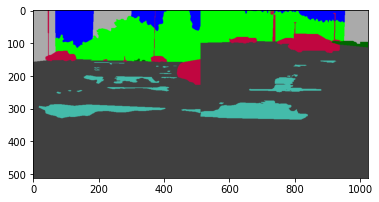

In [10]:
import matplotlib.pyplot as plt

plt.imshow(gt_mix)

# Scaleable

## Shuffle img

In [9]:
import random
import os
import glob

print(os.getcwd())
label_folder = 'Datasets/NewLabels/*.png'
hsi_folder = 'Datasets/WATER_HSI/*.hdr'

labels = (glob.glob(label_folder))
train = (glob.glob(hsi_folder))
print(labels[0:4])
print(train[0:4])

labels = random.Random(1337).sample(labels, len(labels))
train = random.Random(1337).sample(train, len(train))

print(labels[0:4])
print(train[0:4])

c:\Users\omare\Desktop\DeepHyperX-MV2021
['Datasets/NewLabels\\newlabel003.png', 'Datasets/NewLabels\\newlabel005.png', 'Datasets/NewLabels\\newlabel006.png', 'Datasets/NewLabels\\newlabel007.png']
['Datasets/WATER_HSI\\REFLECTANCE_2021-09-12_003.hdr', 'Datasets/WATER_HSI\\REFLECTANCE_2021-09-12_005.hdr', 'Datasets/WATER_HSI\\REFLECTANCE_2021-09-12_006.hdr', 'Datasets/WATER_HSI\\REFLECTANCE_2021-09-12_007.hdr']
['Datasets/NewLabels\\newlabel039.png', 'Datasets/NewLabels\\newlabel028.png', 'Datasets/NewLabels\\newlabel015.png', 'Datasets/NewLabels\\newlabel026.png']
['Datasets/WATER_HSI\\REFLECTANCE_2021-09-12_039.hdr', 'Datasets/WATER_HSI\\REFLECTANCE_2021-09-12_028.hdr', 'Datasets/WATER_HSI\\REFLECTANCE_2021-09-12_015.hdr', 'Datasets/WATER_HSI\\REFLECTANCE_2021-09-12_026.hdr']


## HSI

In [2]:
import numpy as np
import spectral
from PIL import Image
import matplotlib.pyplot as plt
import os

hsi_folder = 'Datasets/WATER_HSI/'
max_train = 30
arr_mix_train = 0
arr_mix_test = 0
i = 0
for file in train:
    if file.endswith('.hdr'):
        #full_hsi_path = os.path.join(hsi_folder, file)
        hs_data = spectral.open_image(file)
        arr = np.array(hs_data.load(), dtype= np.float64) #python int too long to convert to c long
        print(file)
        if i == 0:
            arr_mix_train = arr
            print(arr_mix_train.shape)
        elif i == max_train:
            arr_mix_test = arr
            print(arr_mix_test.shape) 
        elif i > max_train:
            arr_mix_test = np.concatenate((arr_mix_test, arr), axis = 1)
            print(arr_mix_test.shape)              
        else:
            arr_mix_train = np.concatenate((arr_mix_train, arr), axis = 1) 
            print(arr_mix_train.shape)
        
        i += 1
        

Datasets/WATER_HSI\REFLECTANCE_2021-09-12_039.hdr
(512, 512, 204)
Datasets/WATER_HSI\REFLECTANCE_2021-09-12_028.hdr
(512, 1024, 204)
Datasets/WATER_HSI\REFLECTANCE_2021-09-12_015.hdr
(512, 1536, 204)
Datasets/WATER_HSI\REFLECTANCE_2021-09-12_026.hdr
(512, 2048, 204)
Datasets/WATER_HSI\REFLECTANCE_2021-09-12_017.hdr
(512, 2560, 204)
Datasets/WATER_HSI\REFLECTANCE_2021-09-12_025.hdr
(512, 3072, 204)
Datasets/WATER_HSI\REFLECTANCE_2021-09-12_030.hdr
(512, 3584, 204)
Datasets/WATER_HSI\REFLECTANCE_2021-09-12_016.hdr
(512, 4096, 204)
Datasets/WATER_HSI\REFLECTANCE_2021-09-12_014.hdr
(512, 4608, 204)
Datasets/WATER_HSI\REFLECTANCE_2021-09-12_035.hdr
(512, 5120, 204)
Datasets/WATER_HSI\REFLECTANCE_2021-09-12_027.hdr
(512, 5632, 204)
Datasets/WATER_HSI\REFLECTANCE_2021-09-12_011.hdr
(512, 6144, 204)
Datasets/WATER_HSI\REFLECTANCE_2021-09-12_036.hdr
(512, 6656, 204)
Datasets/WATER_HSI\REFLECTANCE_2021-09-12_032.hdr
(512, 7168, 204)
Datasets/WATER_HSI\REFLECTANCE_2021-09-12_007.hdr
(512, 7680, 2

## PCA on multiple images merged

In [3]:
from sklearn.decomposition import PCA

pc_30 = PCA(n_components=30)
#pc_095 = PCA(n_components=0.99)

### Reshape

In [4]:
train_shape = arr_mix_train.shape
test_shape = arr_mix_test.shape

In [5]:
arr_mix_train = np.reshape(arr_mix_train, (-1, train_shape[2]))
arr_mix_test = np.reshape(arr_mix_test, (-1, test_shape[2]))

arr_mix_train = pc_30.fit_transform(arr_mix_train)
arr_mix_test = pc_30.transform(arr_mix_test)
arr_mix_train = np.reshape(arr_mix_train, (train_shape[0], train_shape[1], -1))
arr_mix_test = np.reshape(arr_mix_test, (test_shape[0], test_shape[1], -1))

In [6]:
print(arr_mix_train.shape)
print(arr_mix_test.shape)

(512, 15360, 30)
(512, 2560, 30)


In [7]:
from scipy.io import savemat
mdic_train = {"data": arr_mix_train}
mdic_test = {"data": arr_mix_test}

savemat("hsi_water_train.mat", mdic_train)
savemat("hsi_water_test.mat", mdic_test)

## Groundtruth

In [10]:
import numpy as np
import spectral
from PIL import Image
import matplotlib.pyplot as plt
import os
import glob


label_folder = 'Datasets/WATER_HSI/NewLabels'
max_train = 30
gt_mix_train = 0
gt_mix_test = 0
i = 0
for file in labels:
    if file.endswith('.png'):
        #full_label_path = os.path.join(label_folder, file)
        gt = np.asarray(Image.open(file))
        print(file)
        if i == 0:
            gt_mix_train = gt
            print(gt_mix_train.shape)
        elif i == max_train:
            gt_mix_test = gt
            print(gt_mix_test.shape)    
        elif i > max_train:
            gt_mix_test = np.concatenate((gt_mix_test, gt), axis = 1)
            print(gt_mix_test.shape)    

        else:
            gt_mix_train = np.concatenate((gt_mix_train, gt), axis = 1)
            print(gt_mix_train.shape)
            

        i += 1

Datasets/NewLabels\newlabel039.png
(512, 512, 3)
Datasets/NewLabels\newlabel028.png
(512, 1024, 3)
Datasets/NewLabels\newlabel015.png
(512, 1536, 3)
Datasets/NewLabels\newlabel026.png
(512, 2048, 3)
Datasets/NewLabels\newlabel017.png
(512, 2560, 3)
Datasets/NewLabels\newlabel025.png
(512, 3072, 3)
Datasets/NewLabels\newlabel030.png
(512, 3584, 3)
Datasets/NewLabels\newlabel016.png
(512, 4096, 3)
Datasets/NewLabels\newlabel014.png
(512, 4608, 3)
Datasets/NewLabels\newlabel035.png
(512, 5120, 3)
Datasets/NewLabels\newlabel027.png
(512, 5632, 3)
Datasets/NewLabels\newlabel011.png
(512, 6144, 3)
Datasets/NewLabels\newlabel036.png
(512, 6656, 3)
Datasets/NewLabels\newlabel032.png
(512, 7168, 3)
Datasets/NewLabels\newlabel007.png
(512, 7680, 3)
Datasets/NewLabels\newlabel018.png
(512, 8192, 3)
Datasets/NewLabels\newlabel033.png
(512, 8704, 3)
Datasets/NewLabels\newlabel006.png
(512, 9216, 3)
Datasets/NewLabels\newlabel021.png
(512, 9728, 3)
Datasets/NewLabels\newlabel029.png
(512, 10240, 3)


(512, 15360, 3)
(512, 2560, 3)


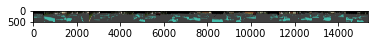

In [11]:
print(gt_mix_train.shape)
print(gt_mix_test.shape)
plt.imshow(gt_mix_train)

In [12]:
from PIL import Image

im_train = Image.fromarray(gt_mix_train)
im_test = Image.fromarray(gt_mix_test)
im_train.save('hsi_water_train_gt.png')
im_test.save('hsi_water_test_gt.png')